In [2]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [11]:
input_img = Input(shape = (3072, ))
encoded = Dense(units = 128, activation = 'relu')(input_img)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 32, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 3072, activation = 'tanh')(decoded)

In [12]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [13]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112

In [14]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
Total params: 424,352
Trainable params: 424,352
Non-trainable params: 0
_____________________________________________________

In [15]:
autoencoder.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test, x_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 221us/step - loss: 0.0515 - accuracy: 8.6000e-04 - val_loss: 0.0371 - val_accuracy: 0.0012
Epoch 2/50
50000/50000 [==============================] - 11s 210us/step - loss: 0.0338 - accuracy: 0.0015 - val_loss: 0.0329 - val_accuracy: 0.0010
Epoch 3/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.0298 - accuracy: 0.0021 - val_loss: 0.0275 - val_accuracy: 0.0022
Epoch 4/50
50000/50000 [==============================] - 15s 295us/step - loss: 0.0261 - accuracy: 0.0023 - val_loss: 0.0258 - val_accuracy: 0.0020
Epoch 5/50
50000/50000 [==============================] - 14s 276us/step - loss: 0.0249 - accuracy: 0.0027 - val_loss: 0.0245 - val_accuracy: 0.0018
Epoch 6/50
50000/50000 [==============================] - 14s 279us/step - loss: 0.0243 - accuracy: 0.0031 - val_loss: 0.0244 - val_accuracy: 0.0028
Epoch 7/50
50000/50000 [============================

In [16]:
encoded_test_data = encoder.predict(x_test)
predicted_test_data = autoencoder.predict(x_test)

In [17]:
encoded_test_data.shape

(10000, 32)

In [18]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [19]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 34)

In [20]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Deep_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Deep_Encoders_Test_RTAM.csv', index = False)

In [21]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : cat


In [22]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 700


In [23]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [24]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [25]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance
7014,3,cat,3.795632,2.544207,3.166904,4.355550,1.901885,2.814483,0.0,3.261998,...,0.0,2.695953,2.786493,2.851933,2.295295,0.0,1.690982,2.697966,1.000000,5.960464e-08
1170,7,horse,5.456158,2.788356,4.646539,5.289941,3.038565,3.991672,0.0,4.889660,...,0.0,3.673303,5.152323,4.194305,4.170909,0.0,1.859182,4.366035,0.983480,1.651990e-02
1334,3,cat,3.861463,2.304890,3.772730,4.823950,1.764919,2.703154,0.0,4.491868,...,0.0,2.529950,3.738086,2.878452,3.271121,0.0,1.321045,3.643813,0.981294,1.870632e-02
7772,3,cat,3.681693,2.722714,4.011057,5.455369,3.011969,4.182796,0.0,4.071285,...,0.0,2.873854,4.524286,4.132226,3.580492,0.0,1.821173,2.755250,0.978914,2.108568e-02
3740,0,airplane,7.148499,2.952203,3.808667,5.219440,3.141560,4.137774,0.0,5.931113,...,0.0,3.885807,3.441776,4.984704,3.291365,0.0,2.187925,3.314811,0.978675,2.132481e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,4,deer,1.804748,1.247851,0.509165,2.332332,0.956941,0.131718,0.0,0.934125,...,0.0,1.198312,1.334079,0.485536,0.672019,0.0,1.084527,1.015389,0.808769,1.912311e-01
3119,4,deer,1.616702,1.651088,0.626267,1.303150,1.426189,0.626000,0.0,1.610546,...,0.0,1.220186,0.709431,0.644409,0.707365,0.0,0.741989,0.548526,0.800164,1.998355e-01
6026,3,cat,5.219378,4.006905,2.117538,3.029121,3.178277,0.912949,0.0,2.831279,...,0.0,2.594979,3.039995,1.526042,2.118266,0.0,0.931594,1.299560,0.799810,2.001897e-01
8070,5,dog,4.147768,2.500905,2.242458,1.951842,1.353857,2.448028,0.0,1.187109,...,0.0,2.450763,2.546276,1.416688,1.438608,0.0,0.534505,1.208434,0.796253,2.037472e-01


In [26]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

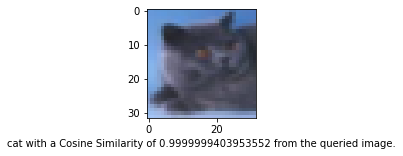

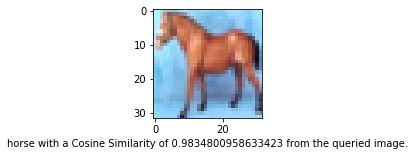

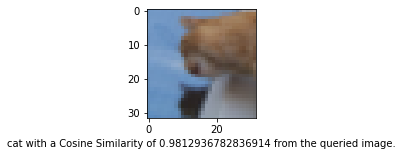

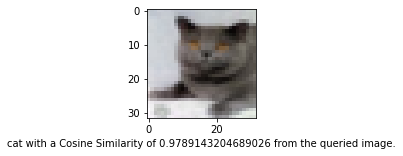

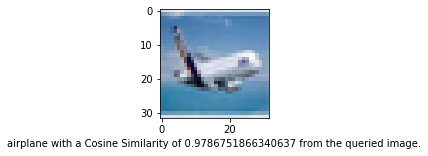

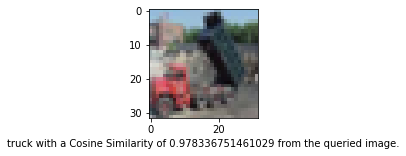

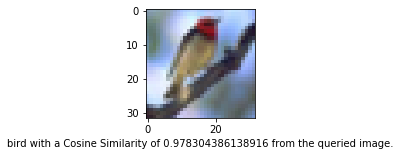

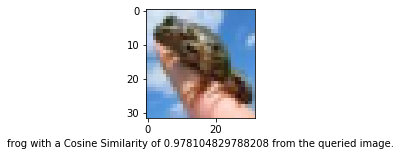

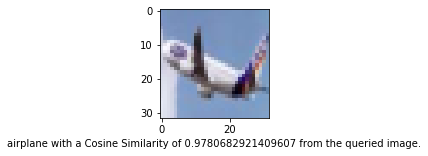

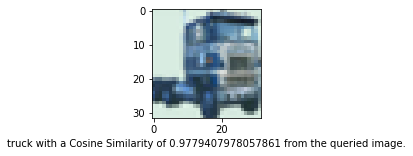

In [27]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [28]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [29]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance,Euclidean Distance
7014,3,cat,3.795632,2.544207,3.166904,4.355550,1.901885,2.814483,0.0,3.261998,...,2.695953,2.786493,2.851933,2.295295,0.0,1.690982,2.697966,1.000000,5.960464e-08,0.000000
8615,9,truck,4.380368,2.385459,2.858238,3.910069,1.752281,2.842280,0.0,4.801076,...,2.398909,2.655546,3.281688,2.395820,0.0,1.309829,2.390385,0.977491,2.250898e-02,3.145764
9706,9,truck,2.999874,2.594799,3.169684,4.125625,1.672868,3.201372,0.0,4.309266,...,2.916048,3.580771,2.980234,2.718235,0.0,1.601286,1.695688,0.978337,2.166325e-02,3.218633
6775,0,airplane,3.698957,2.040801,3.464349,3.895027,1.727041,2.254747,0.0,3.813869,...,1.518713,3.168456,3.390552,3.288336,0.0,0.943363,1.987781,0.975008,2.499241e-02,3.225524
2426,2,bird,3.928161,1.644547,2.859349,3.933911,2.065698,2.703023,0.0,3.702438,...,1.992302,2.776868,2.494401,2.607775,0.0,0.801776,1.955480,0.974831,2.516901e-02,3.388013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,0,airplane,9.602813,3.253772,5.777323,7.636608,3.676656,4.987467,0.0,9.268400,...,4.436051,8.212875,7.793247,6.187909,0.0,3.397784,3.913574,0.958222,4.177821e-02,19.385141
218,8,ship,9.436128,3.232377,6.343981,7.677076,4.485929,6.246330,0.0,9.149520,...,4.898196,7.693012,6.734238,6.431811,0.0,3.404580,5.283672,0.968780,3.122032e-02,19.505174
9848,2,bird,8.533062,4.256577,5.074019,8.446680,4.533607,6.985914,0.0,9.714566,...,4.425282,7.748300,6.702033,6.888706,0.0,3.502450,5.138515,0.968732,3.126818e-02,19.914289
9921,0,airplane,8.989956,3.485009,5.625355,8.302534,4.883767,5.970737,0.0,9.350985,...,4.843243,8.466671,6.626676,6.834029,0.0,4.133235,4.522189,0.964205,3.579545e-02,20.173966


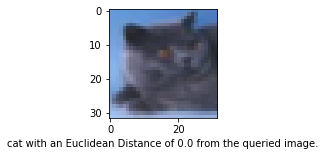

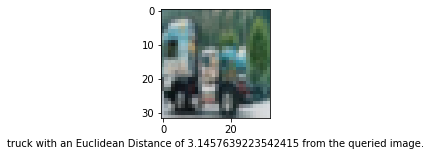

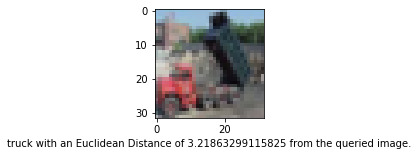

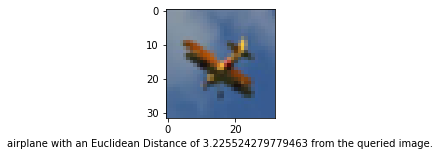

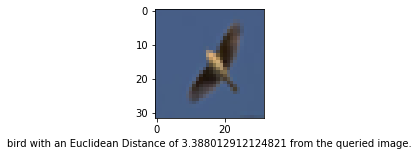

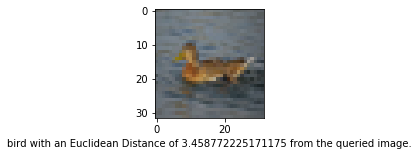

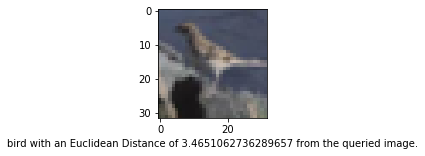

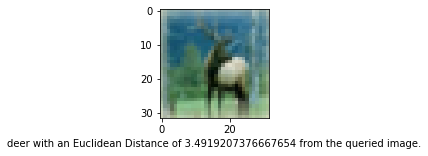

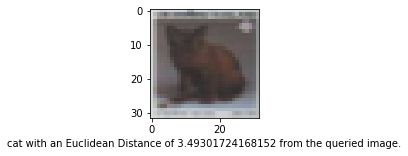

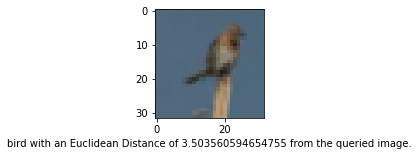

In [30]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()